In [14]:
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as p

user = pd.read_csv('users_brands.csv')
brand = pd.read_csv('brand_features.csv')

We started the preprocessing phase by evaluating the quality of our dataset, that is, if there were any not attributed values. We did this using a simple Python routine and found that there were no nan's in our dataset.

In [61]:
user.isnull().values.any()

False

After this we checked the type of data in each variable

In [62]:
for i in user.columns:
    print(type(user[i][0]))

<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int64'>
<class 'int'>


In [17]:
user.loc[user['user_id']==user['user_id'][0]]

,user_id,brand_id,platform,country,user_segment,purchase_date,perc_sale
0,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,92850413,35279833,country_76,segment_2,154,0.0
477114,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,68233099,35279833,country_76,segment_2,177,"(0, 25]"
567165,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,16073974,35279833,country_76,segment_2,42,0.0


In [18]:
pd.unique(user['perc_sale'])

array(['0.0', '(25, 50]', '(0, 25]', '(50, 75]', '(75, 100]'],
      dtype=object)

As described in the table, the values assigned to the variables "country" and "user\_segment" are simply strings composed of the word "country\_" and "segment\_" followed by an unique integer that characterizes each country and segment. Thus, we found it to be a good preprocessing step to simply substitute the formula "attribute\_"+integer by just the integer.

In [19]:
user['country']=user['country'].str.replace('country_','').astype(int)

<AxesSubplot:>

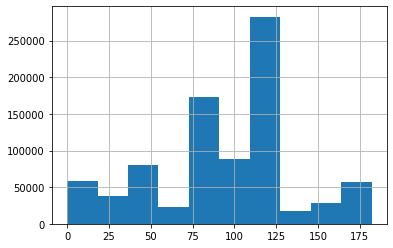

In [20]:
user['country'].hist()

In [21]:
user['user_segment']=user['user_segment'].str.replace('segment_','').astype(int)

In [22]:
pd.unique(user['user_segment'])

array([2, 1, 4, 3, 0, 5])

In [23]:
user

,user_id,brand_id,platform,country,user_segment,purchase_date,perc_sale
0,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,92850413,35279833,76,2,154,0.0
1,e45ae0e683895ab429483c3aaeba836c9e6904692daeba...,59833398,35279833,144,1,114,0.0
2,ab112830f538338e386af96be442ea1d9e81d76fabc17b...,72430441,35279833,35,4,204,"(25, 50]"
3,577321c8f3b5bff9e5470184606207ed04edc14a82f706...,29631653,82921252,177,3,139,"(25, 50]"
4,75624f1d112034145f181fb895479093f94ea2a7de0e48...,50327475,35279833,125,0,170,0.0
...,...,...,...,...,...,...,...
846485,aa0ba83af14b4314c75e427e060aad6305f02165554a56...,31881992,35279833,90,4,94,0.0
846486,d0d6f479f00b931101cfc8c39d1e80904d39857d72a297...,97883134,59713904,165,2,207,0.0
846487,97e0c1b8d49f1537cc5784facea8da25281fca40d1cc85...,63078600,59713904,126,2,205,0.0
846488,bef5df34d2f63ca40b20377a4eabe5948cc074d2edffc8...,48210076,50298854,134,1,63,0.0


<AxesSubplot:>

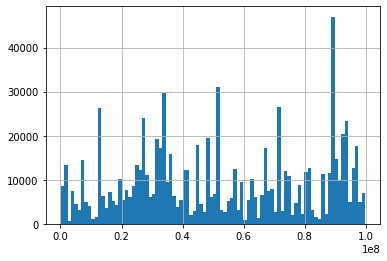

In [24]:
user['brand_id'].hist(bins='auto')

<AxesSubplot:>

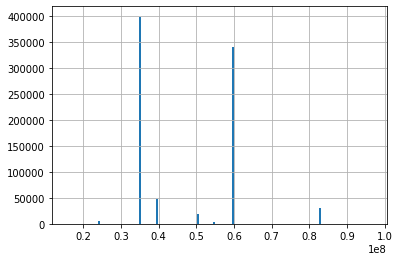

In [25]:
user['platform'].hist(bins='auto')

After this, we had to deal with the "perc\_sale" variable which has some values that are a string of an interval between two integers, for example, '(25,50]'. The other attributed values are the string '0.0'. We decided to substitute these intervals by an integer that was the mean of the interval and the '0.0' by the integer 0. Thus, the value '(25,50]' was changed to the integer 37.5.

In [26]:
pd.unique(user['perc_sale'])

array(['0.0', '(25, 50]', '(0, 25]', '(50, 75]', '(75, 100]'],
      dtype=object)

In [27]:
user.loc[user['perc_sale']=='0.0','perc_sale']=0

In [28]:
pd.unique(user['perc_sale'])

array([0, '(25, 50]', '(0, 25]', '(50, 75]', '(75, 100]'], dtype=object)

In [29]:
user.loc[user['perc_sale']!= 0,'perc_sale'] = user.loc[user['perc_sale']!=0,'perc_sale'].str.replace('(','').str.replace(']','').str.split(',').apply(lambda x: (int(x[0])+int(x[1]))/2)

C:\Users\Fnac\Anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [30]:
user

,user_id,brand_id,platform,country,user_segment,purchase_date,perc_sale
0,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,92850413,35279833,76,2,154,0
1,e45ae0e683895ab429483c3aaeba836c9e6904692daeba...,59833398,35279833,144,1,114,0
2,ab112830f538338e386af96be442ea1d9e81d76fabc17b...,72430441,35279833,35,4,204,37.5
3,577321c8f3b5bff9e5470184606207ed04edc14a82f706...,29631653,82921252,177,3,139,37.5
4,75624f1d112034145f181fb895479093f94ea2a7de0e48...,50327475,35279833,125,0,170,0
...,...,...,...,...,...,...,...
846485,aa0ba83af14b4314c75e427e060aad6305f02165554a56...,31881992,35279833,90,4,94,0
846486,d0d6f479f00b931101cfc8c39d1e80904d39857d72a297...,97883134,59713904,165,2,207,0
846487,97e0c1b8d49f1537cc5784facea8da25281fca40d1cc85...,63078600,59713904,126,2,205,0
846488,bef5df34d2f63ca40b20377a4eabe5948cc074d2edffc8...,48210076,50298854,134,1,63,0


array([[<AxesSubplot:xlabel='brand_id', ylabel='brand_id'>,
        <AxesSubplot:xlabel='platform', ylabel='brand_id'>,
        <AxesSubplot:xlabel='country', ylabel='brand_id'>,
        <AxesSubplot:xlabel='user_segment', ylabel='brand_id'>,
        <AxesSubplot:xlabel='purchase_date', ylabel='brand_id'>],
       [<AxesSubplot:xlabel='brand_id', ylabel='platform'>,
        <AxesSubplot:xlabel='platform', ylabel='platform'>,
        <AxesSubplot:xlabel='country', ylabel='platform'>,
        <AxesSubplot:xlabel='user_segment', ylabel='platform'>,
        <AxesSubplot:xlabel='purchase_date', ylabel='platform'>],
       [<AxesSubplot:xlabel='brand_id', ylabel='country'>,
        <AxesSubplot:xlabel='platform', ylabel='country'>,
        <AxesSubplot:xlabel='country', ylabel='country'>,
        <AxesSubplot:xlabel='user_segment', ylabel='country'>,
        <AxesSubplot:xlabel='purchase_date', ylabel='country'>],
       [<AxesSubplot:xlabel='brand_id', ylabel='user_segment'>,
        <AxesS

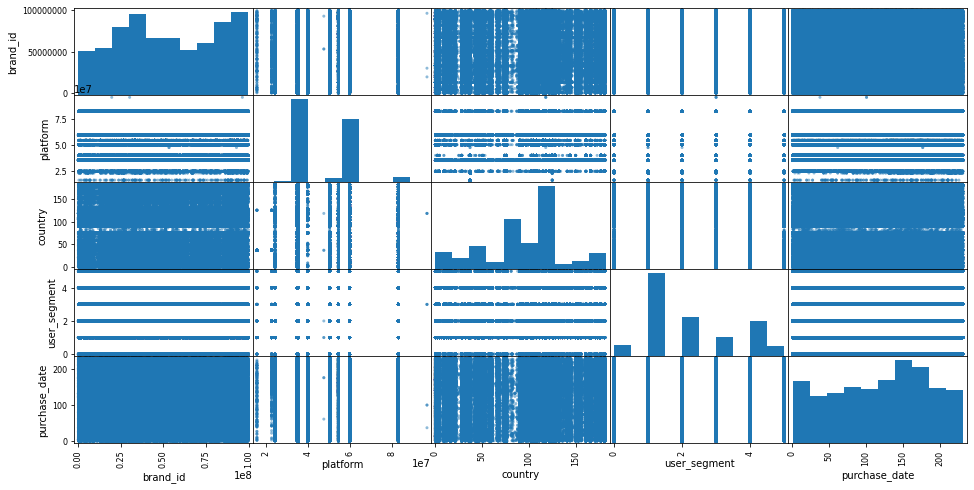

In [31]:
pd.plotting.scatter_matrix(user.drop(columns='user_id'),figsize = (16,8))

Since we are trying to understand the rules that can allow us to make predictions, it is fair to trim the dataset by virtue of eliminating the users that perform the least number of purchases. In our project we discard the users that perform less than 6 purchases.

Since the data is, as mentioned above, encrypted, we can't perform qualitative analysis on the features of the users in our dataset, but we can say:

->There are 12 different platforms; but most of the purchases are made in two of them;

->Most of the purchases are either performed with no discount (45,3$\%$) or with a discount of [25,50]$\%$ (38,0$\%$);

In [32]:
brand

,brand_id,features
0,79343398,[ 1.91358113e+00 3.43185329e+00 1.21365225e+...
1,31216129,[ 3.17424983e-02 -4.59801525e-01 6.14280820e-...
2,65961969,[-0.22207394 -0.01656507 -0.09216249 0.039823...
3,11870478,[ 0.01922642 -0.07236854 -0.04028177 0.023201...
4,92645240,[ 0.12865387 -0.44646788 -0.90568423 -0.486786...
...,...,...
1810,88444677,[-1.00042522e-01 2.80876663e-02 -4.39237833e-...
1811,38129575,[-0.48134992 0.03621267 -1.34484553 0.417581...
1812,79169192,[ 0.41123554 -0.25272626 -0.54311454 0.426929...
1813,67279918,[ 0.01315027 0.04131372 -0.29090327 0.128389...


In [33]:
user.to_csv('new_user.csv', index = False)

In [34]:
newuser = pd.read_csv('new_user.csv')
newuser

,user_id,brand_id,platform,country,user_segment,purchase_date,perc_sale
0,65b4c425c57d4d5cd6a09b6721f76dfe76fca72000a58a...,92850413,35279833,76,2,154,0.0
1,e45ae0e683895ab429483c3aaeba836c9e6904692daeba...,59833398,35279833,144,1,114,0.0
2,ab112830f538338e386af96be442ea1d9e81d76fabc17b...,72430441,35279833,35,4,204,37.5
3,577321c8f3b5bff9e5470184606207ed04edc14a82f706...,29631653,82921252,177,3,139,37.5
4,75624f1d112034145f181fb895479093f94ea2a7de0e48...,50327475,35279833,125,0,170,0.0
...,...,...,...,...,...,...,...
846485,aa0ba83af14b4314c75e427e060aad6305f02165554a56...,31881992,35279833,90,4,94,0.0
846486,d0d6f479f00b931101cfc8c39d1e80904d39857d72a297...,97883134,59713904,165,2,207,0.0
846487,97e0c1b8d49f1537cc5784facea8da25281fca40d1cc85...,63078600,59713904,126,2,205,0.0
846488,bef5df34d2f63ca40b20377a4eabe5948cc074d2edffc8...,48210076,50298854,134,1,63,0.0


In [35]:
df = pd.read_csv("new_user.csv") #Importing the csv file 

Afterwards, we noted that the values assigned to the variable user\_id were strings with many characters. This big number of characters is certainly due to an encryption method used by the company to rightly protected the privacy of their customers but it is unnecessary for us and, above all, computationally disadvantageous to have so much memory being used unnecessarily. For that reason we wrote a Python routine to replace the big strings by integers from 0 to 846490 which is the total number of unique users. We made sure to correctly attribute the same number to every occurrence of the same user maintaining this way the integrity of our dataset. 

In [45]:
df_sort =  df.sort_values(['user_id'])
count = df.sort_values(['user_id']).groupby(['user_id']).count()['brand_id']
count1 = np.array(count)

In [46]:
count1

array([1, 2, 5, ..., 1, 1, 2], dtype=int64)

In [47]:
users = []                         
for i in (range(len(count1))):
    for j in range(count1[i]):
        users.append(i)

In [48]:
df_sort['user_id'] = users

In [52]:
df_sort.to_csv('sorted.csv',index=False) #We now save this updated csv for future use